This is the begining. I want to try and make a map of Hong Kong, reflecting population distribution or age distribution

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
#mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
mpl.rc('font',family='MS Gothic')


In [2]:
# 空間データなので geopandas (gpd) でインポート

hkshape = gpd.read_file('data/Hong_Kong_18_Districts.zip')

I got this from https://opendata.esrichina.hk/datasets/esrihk::hong-kong-18-districts/explore

<Axes: >

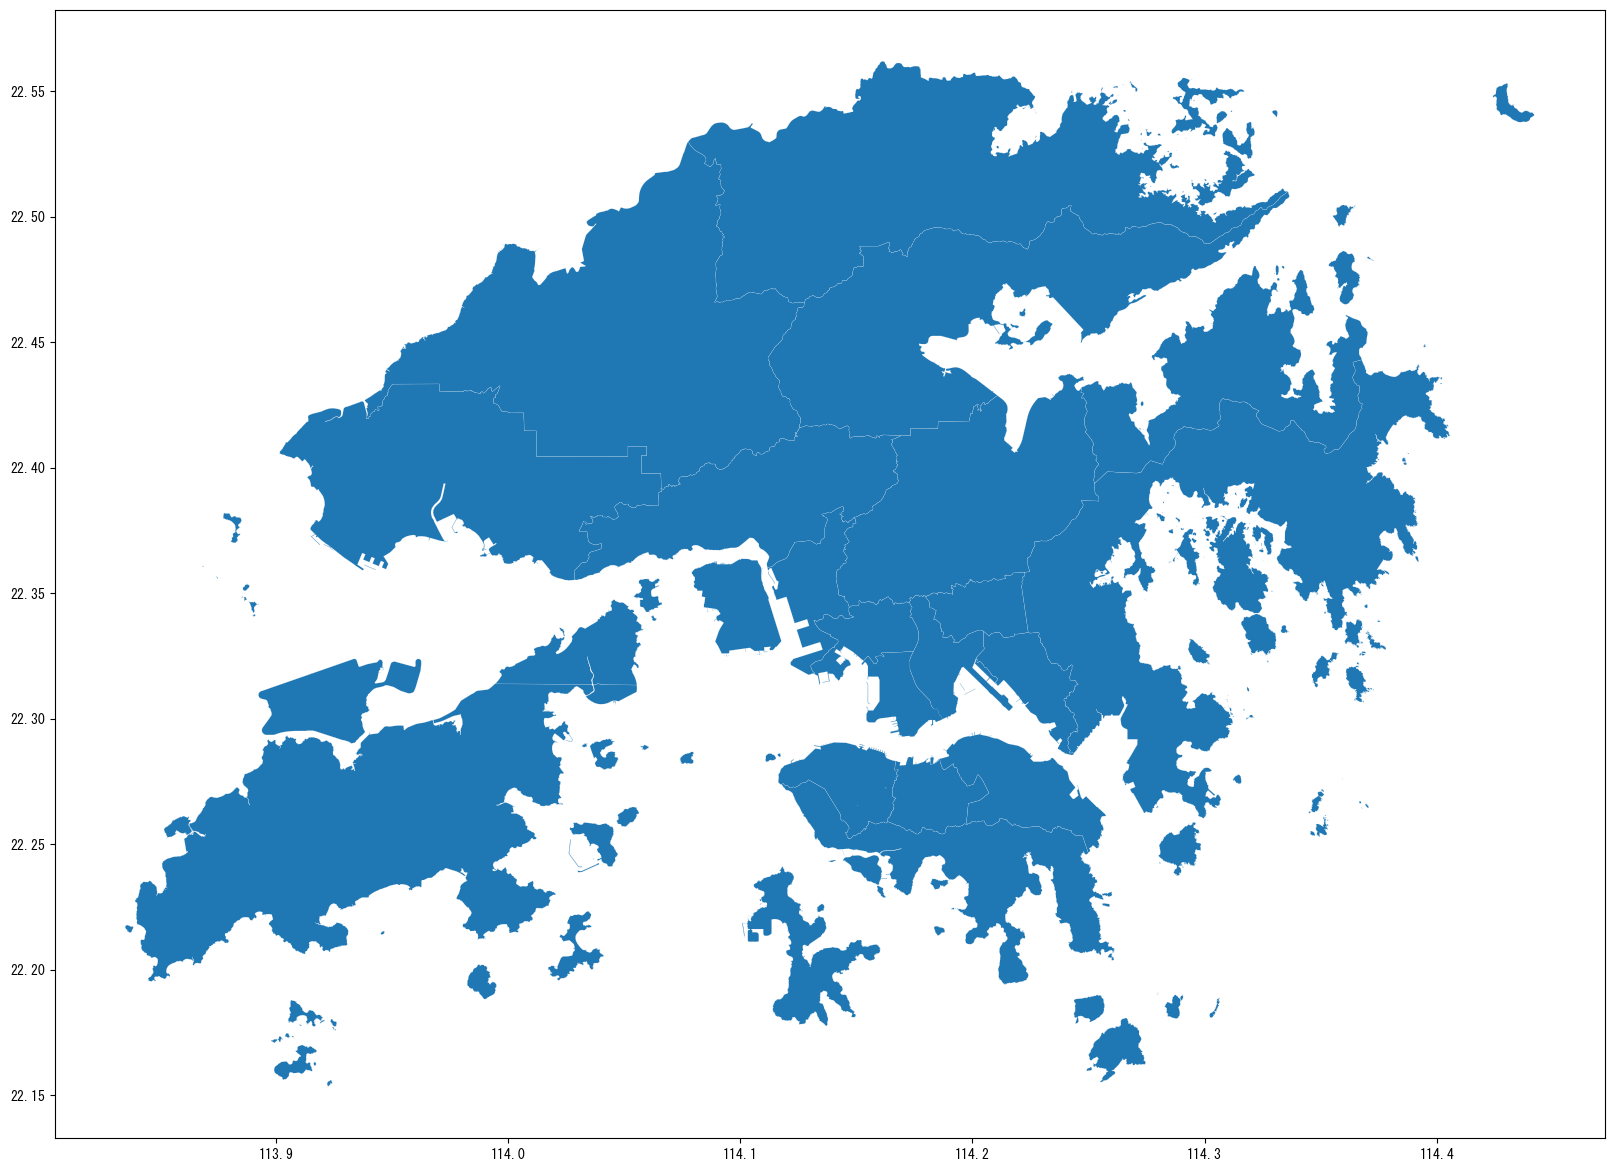

In [3]:
# quick plot
hkshape.plot(figsize=(20,20),edgecolor='white',linewidth=0.1)

In [4]:
hkshape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    18 non-null     int64   
 1   ID          18 non-null     float64 
 2   CNAME       18 non-null     object  
 3   CNAME_S     18 non-null     object  
 4   ENAME       18 non-null     object  
 5   SHAPE_Leng  18 non-null     float64 
 6   SHAPE_Area  18 non-null     float64 
 7   geometry    18 non-null     geometry
dtypes: float64(3), geometry(1), int64(1), object(3)
memory usage: 1.3+ KB


In [5]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
hkcensus = pd.read_csv('data/population_hkg_2018-10-01.csv.zip')

# Got this from https://data.humdata.org/dataset/hong-kong-high-resolution-population-density-maps-demographic-estimates?
It has data for 2015 and 2020 populations plus latitude and longtitude

In [6]:
hkcensus.head

<bound method NDFrame.head of          latitude   longitude  population_2015  population_2020
0       22.160139  113.899028         9.337329         9.659727
1       22.163472  114.253194        17.163928        17.446940
2       22.163750  114.254306        17.163928        17.446940
3       22.164306  114.251250        17.163928        17.446940
4       22.164861  113.910139         9.337329         9.659727
...           ...         ...              ...              ...
109950  22.559306  114.170417         4.370319         4.752405
109951  22.559306  114.170694         4.370319         4.752405
109952  22.559306  114.177917         4.370319         4.752405
109953  22.559583  114.177639         4.370319         4.752405
109954  22.559583  114.178194         4.370319         4.752405

[109955 rows x 4 columns]>

In [7]:
hkcensus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109955 entries, 0 to 109954
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   latitude         109955 non-null  float64
 1   longitude        109955 non-null  float64
 2   population_2015  109955 non-null  float64
 3   population_2020  109955 non-null  float64
dtypes: float64(4)
memory usage: 3.4 MB


In [8]:
hkshape.info

<bound method DataFrame.info of     OBJECTID    ID CNAME CNAME_S              ENAME  SHAPE_Leng  SHAPE_Area  \
0          1   1.0  黃大仙區    黄大仙区       WONG TAI SIN    0.156228    0.000816   
1          2   6.0  九龍城區    九龙城区       KOWLOON CITY    0.273668    0.000884   
2          3   7.0   觀塘區     观塘区          KWUN TONG    0.220475    0.000987   
3          4   8.0   西貢區     西贡区           SAI KUNG    3.154700    0.011963   
4          5  11.0    北區      北区              NORTH    1.671697    0.012070   
5          6  13.0   中西區     中西区  CENTRAL & WESTERN    0.231894    0.001091   
6          7  14.0   灣仔區     湾仔区           WAN CHAI    0.168909    0.000867   
7          8  15.0    東區      东区            EASTERN    0.313439    0.001631   
8          9  17.0   屯門區     屯门区           TUEN MUN    0.859430    0.007402   
9         10  18.0   元朗區     元朗区          YUEN LONG    0.790774    0.012297   
10        11  16.0    南區      南区           SOUTHERN    0.976238    0.003469   
11        12   2.0  

I'm not sure what to do from here, I don't think I can merge the two "properly", but technically the latitude and longtitude is there.

In [9]:
hkpop = pd.read_csv('data/Hong_Kong_Population_Density_2021.csv')

In [10]:
hkpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            18 non-null     int64  
 1   分區                  18 non-null     object 
 2   District            18 non-null     object 
 3   人口密度                18 non-null     int64  
 4   Population_Density  18 non-null     int64  
 5   Shape__Area         18 non-null     float64
 6   Shape__Length       18 non-null     float64
 7   總人口                 18 non-null     int64  
 8   Total_population    18 non-null     int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.4+ KB


In [12]:
hkshape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    18 non-null     int64   
 1   ID          18 non-null     float64 
 2   CNAME       18 non-null     object  
 3   CNAME_S     18 non-null     object  
 4   ENAME       18 non-null     object  
 5   SHAPE_Leng  18 non-null     float64 
 6   SHAPE_Area  18 non-null     float64 
 7   geometry    18 non-null     geometry
dtypes: float64(3), geometry(1), int64(1), object(3)
memory usage: 1.3+ KB


In [ ]:
# merge the data
hkshape = hkshape.merge(hkpop, on='KEY_CODE')

In [13]:
hkgeo = gpd.read_file('data/Hong_Kong_Population_Density_2021.geojson')

https://opendata.esrichina.hk/datasets/esrihk::hong-kong-population-density-by-18-districts-in-2021/explore
# Found data from here - using geojson

<Axes: >

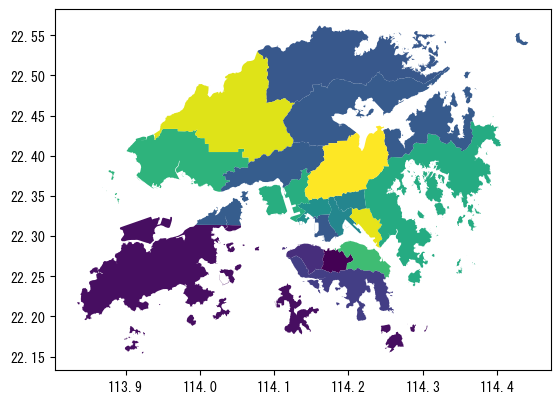

In [17]:
hkgeo.plot(column='Total_population')

In [16]:
hkgeo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OBJECTID            18 non-null     int64   
 1   分區                  18 non-null     object  
 2   District            18 non-null     object  
 3   人口密度                18 non-null     int64   
 4   Population_Density  18 non-null     int64   
 5   Shape__Area         18 non-null     float64 
 6   Shape__Length       18 non-null     float64 
 7   總人口                 18 non-null     int64   
 8   Total_population    18 non-null     int64   
 9   geometry            18 non-null     geometry
dtypes: float64(2), geometry(1), int64(5), object(2)
memory usage: 1.5+ KB


Arrests in 2019 Riots????
regions of contestation??